In [14]:
import skrf as rf
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


/home/hash/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'pi', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


A 3dB hybrid coupler is defined by the scattering matrix:
$$
\mathbf{S}_c
=
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cccc}
0 & 1 & j & 0 \\
1 & 0 & 0 & j \\
j & 0 & 0 & 1 \\
0 & j & 1 & 0
\end{array}
\right)
$$

In [2]:
Sc = 1/sqrt(2)*np.array([[0,1,1j,0], [1,0,0,1j], [1j,0,0,1], [0,1j,1,0]])

The line stretcher is defined by the following scattering matrix :
$$
\mathbf{S}_{ls}(\ell)
=
\left(
\begin{array}{cc}
0 & \exp(-j\beta \ell) \\
\exp(-j\beta \ell) & 0 
\end{array}
\right)
$$
with $\beta=\omega/c$

In [3]:
from scipy.constants import c, pi

def S_ls(l=0, f=50e6):
    beta=2*pi*f/c
    delta=np.exp(-1j*beta*l)
    return np.array([[0, delta], [delta,0]])

The combination of two 3dB hybrid junctions and a line strecher leads to an adjustable coupler
$$
\mathbf{S}_{vc}
=
\frac{1}{2}
\left(
\begin{array}{cccc}
0 & (1-\delta) & j(1+\delta) & 0 \\
(1-\delta) & 0 & 0 & j(1+\delta) \\
j(1+\delta) & 0 & 0 & -(1-\delta) \\
0 & j(1+\delta) & -(1-\delta) & 0
\end{array}
\right)
$$
with $\delta=\exp(-j \beta \ell)$

In [38]:
def S_vc(l=0, f=50e6):
    beta = 2*pi*f/c
    delta = np.exp(-1j*beta*l)
    S_vc = 1/2*np.array([
        [0, (1-delta), 1j*(1+delta), 0], 
        [(1-delta), 0, 0, 1j*(1+delta)],
        [1j*(1+delta), 0, 0, -(1-delta)],
        [0, 1j*(1+delta), -(1-delta), 0]])
    return S_vc

In [39]:
f=50e6
beta=2*pi*f/c

In [40]:
phi = np.linspace(0, 180, num=180)*pi/180
ls = phi/beta

In [74]:
C = []
for l in ls:
    S = S_vc(l,f)
    C.append(S@r_[1,0.5,0,0])

In [76]:
import cycler

(0, 1)

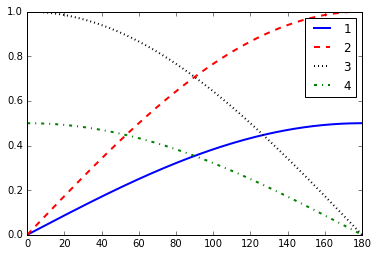

In [75]:
fig,ax=subplots()
# 2. Define prop cycle for single set of axes
ax.set_prop_cycle(cycler.cycler('color', ['b','r','k','g']) 
                  + cycler.cycler('ls', ['-', '--', ':', '-.']))
plot(phi*180/pi, (abs(np.asarray(C))), lw=2)
legend(('1','2','3','4'))
#ylim(-10,0)
ylim(0,1)
#axhline(-3, color='k', ls='--')